In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#paramaters
#change all units to: force = pN, length = nm, time = ms
pars = {}
pars['a00'] = -21*10**-3
pars['a01'] = 1
pars['a10'] = 0
pars['a11'] = -1
pars['gamma0'] = 8.72
pars['gamma1'] = 54.8

pars['kbT'] = 4.1
pars['noise0'] = 2*pars['gamma0']*pars['kbT']
pars['noise1'] = 4.916*(1e3)

pars['delta_t'] = 0.01


In [3]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0'] ) \
        + ( pars['a01']**2 * pars['noise1'] ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

In [4]:
def analytical_soln_real_response(omega_list, pars):
    real_response_list = []
    for omega in omega_list:
        numerator = - (omega**2)*(pars['gamma1']**2)*pars['a00'] \
        - (pars['a11']**2)*pars['a00'] \
        + pars['a10']*pars['a01']*pars['a11']
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )
        
        real_response = numerator/denominator
        real_response_list.append(real_response)
    return real_response_list

In [5]:
def analytical_soln_imaginary_response(omega_list, pars):
    im_response_list = []
    for omega in omega_list:
        numerator = omega*(
            (pars['gamma1']*pars['a10']*pars['a01']) \
            + (pars['gamma0']*(pars['gamma1']**2)*(omega**2)) \
            + ((pars['a11']**2)*pars['gamma0'])
        )
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        
        im_response = numerator/denominator
        im_response_list.append(im_response)
    return im_response_list

In [6]:
np.arange(-20, 20, 1)

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19])

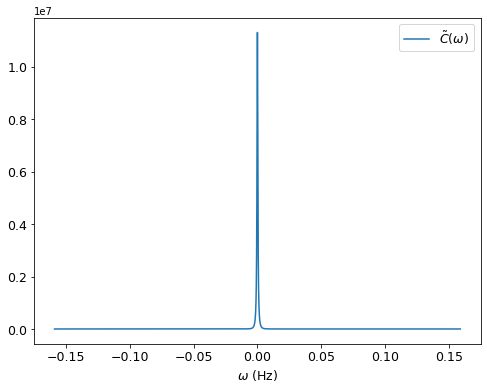

In [9]:
fig = plt.figure(figsize=(8,6))
omega_list = np.arange(-1, 1, 0.0001)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln), label='$\\tilde{C}(\omega)$')
plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
# plt.ylabel('$\~{C}$ ($nm^2$ $s$)', fontsize=12.5)
plt.legend(prop={'size': 12.5})
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
# plt.savefig('autocorr_analytical_sensor.png', dpi=300)
plt.show()

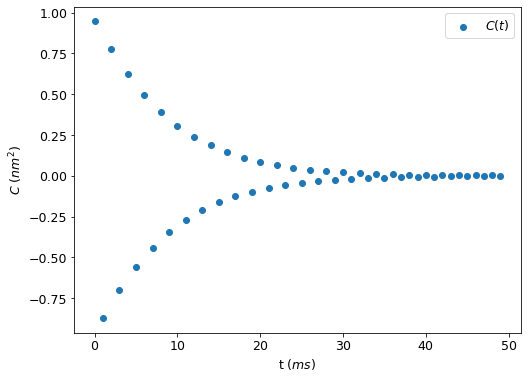

In [16]:
fig = plt.figure(figsize=(8,6))
omega_new_list = np.arange(-20, 20, 0.0001)
paper_soln_logspace = analytical_soln_acf_generic(omega_new_list, pars)
inverse_fourier = np.fft.ifft(np.array(paper_soln_logspace))
plt.scatter(np.arange(len(inverse_fourier.real[:50])) , inverse_fourier.real[:50], label='$C(t)$')
# plt.axhline(0, color='black')

plt.xlabel('t ($ms$)', fontsize=12.5)
plt.ylabel('$C$ $(nm^2)$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
# plt.savefig('inverse_fourier_sensor.png', dpi=300)

plt.show()

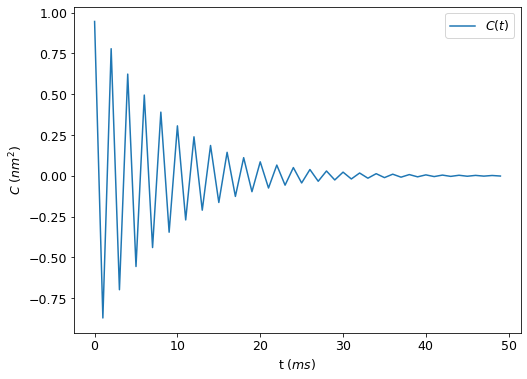

In [15]:
fig = plt.figure(figsize=(8,6))
omega_new_list = np.arange(-20, 20, 0.0001)
paper_soln_logspace = analytical_soln_acf_generic(omega_new_list, pars)
inverse_fourier = np.fft.ifft(np.array(paper_soln_logspace))
plt.plot(np.arange(len(inverse_fourier.real[:50])) , inverse_fourier.real[:50], label='$C(t)$')
# plt.axhline(0, color='black')

plt.xlabel('t ($ms$)', fontsize=12.5)
plt.ylabel('$C$ $(nm^2)$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
# plt.savefig('inverse_fourier_sensor.png', dpi=300)

plt.show()

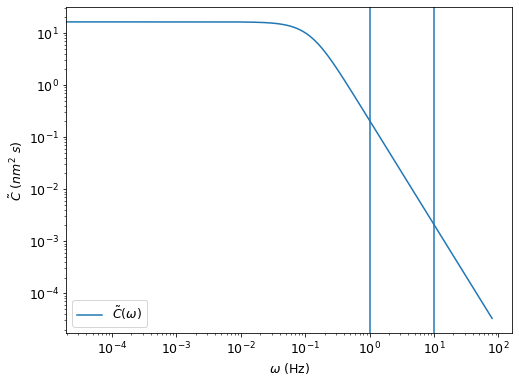

In [16]:
fig = plt.figure(figsize=(8,6))
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(-500, 500, 2000000)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln), label='$\\tilde{C}(\omega)$')
plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
plt.ylabel('$\~{C}$ ($nm^2$ $s$)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
plt.axvline(1)
plt.axvline(10)
plt.savefig('autocorr_analytical_sensor_loglog.png', dpi=300)
plt.show()

Response function

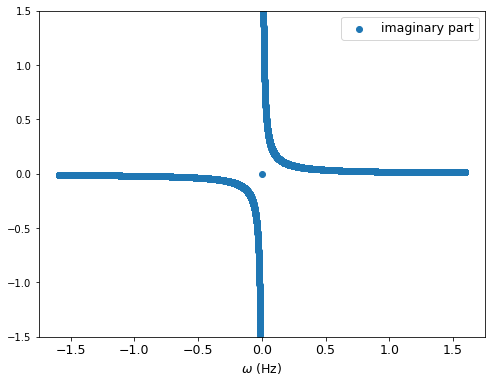

In [13]:
fig = plt.figure(figsize=(8,6))
omega_list = np.arange(-10, 10, 0.001)
paper_real_soln = analytical_soln_real_response(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
# plt.plot(omega_list/(2*np.pi), np.array(paper_real_soln), label="real part")
plt.scatter(omega_list/(2*np.pi), np.array(paper_imaginary_soln), label='imaginary part')
plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
# plt.ylabel("$\~{R}'$, $\~{R}''$ ($km/N$)", fontsize=12.5)
plt.ylim(-1.5, 1.5)
plt.xticks(fontsize=12.5)
# plt.yticks([-2,0, 2], fontsize=12.5)
plt.legend(prop={'size': 12.5})
# plt.savefig('response_analytical_sensor.png', dpi=300)
plt.show()

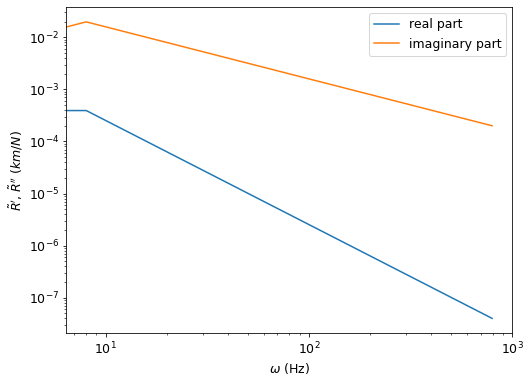

In [19]:
fig = plt.figure(figsize=(8,6))
plt.xscale('log')
plt.yscale('log')
omega_list = np.linspace(-5000, 5000, 100)
paper_real_soln = analytical_soln_real_response(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
plt.plot(omega_list/(2*np.pi), np.array(paper_real_soln), label="real part")
plt.plot(omega_list/(2*np.pi), np.array(paper_imaginary_soln), label='imaginary part')
plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
plt.ylabel("$\~{R}'$, $\~{R}''$ ($km/N$)", fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
plt.savefig('response_analytical_sensor_loglog.png', dpi=300)
plt.show()